#Churn Prediction
Author: Ali Amini

In [ ]:
cd "/content/drive/MyDrive/Rightel"

/content/drive/MyDrive/Rightel


## Dataset Summary

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'Sample_Data.csv'
data = pd.read_csv(file_path)

# Get a summary of the dataset
summary = {
    "number_of_records": len(data),
    "number_of_columns": len(data.columns),
    "column_descriptions": data.dtypes.to_dict()
}

summary


{'number_of_records': 1000,
 'number_of_columns': 26,
 'column_descriptions': {'customerID': dtype('int64'),
  'gender': dtype('O'),
  'age': dtype('int64'),
  'SeniorCitizen': dtype('int64'),
  'Partner': dtype('O'),
  'Dependents': dtype('O'),
  'tenure': dtype('int64'),
  'PhoneService': dtype('O'),
  'MultipleLines': dtype('O'),
  'InternetService': dtype('O'),
  'OnlineSecurity': dtype('O'),
  'OnlineBackup': dtype('O'),
  'DeviceProtection': dtype('O'),
  'TechSupport': dtype('O'),
  'StreamingTV': dtype('O'),
  'StreamingMovies': dtype('O'),
  'Contract': dtype('O'),
  'PaperlessBilling': dtype('O'),
  'PaymentMethod': dtype('O'),
  'MonthlyCharges': dtype('float64'),
  'TotalCharges': dtype('float64'),
  'Churn': dtype('O'),
  'DataUsage': dtype('float64'),
  'VoiceCalls': dtype('int64'),
  'SMSCount': dtype('int64'),
  'AverageChargesPerMonth': dtype('float64')}}

## Handling Missing Values

In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

missing_values_summary = missing_values[missing_values > 0]
missing_values_summary


Series([], dtype: int64)

##EDA

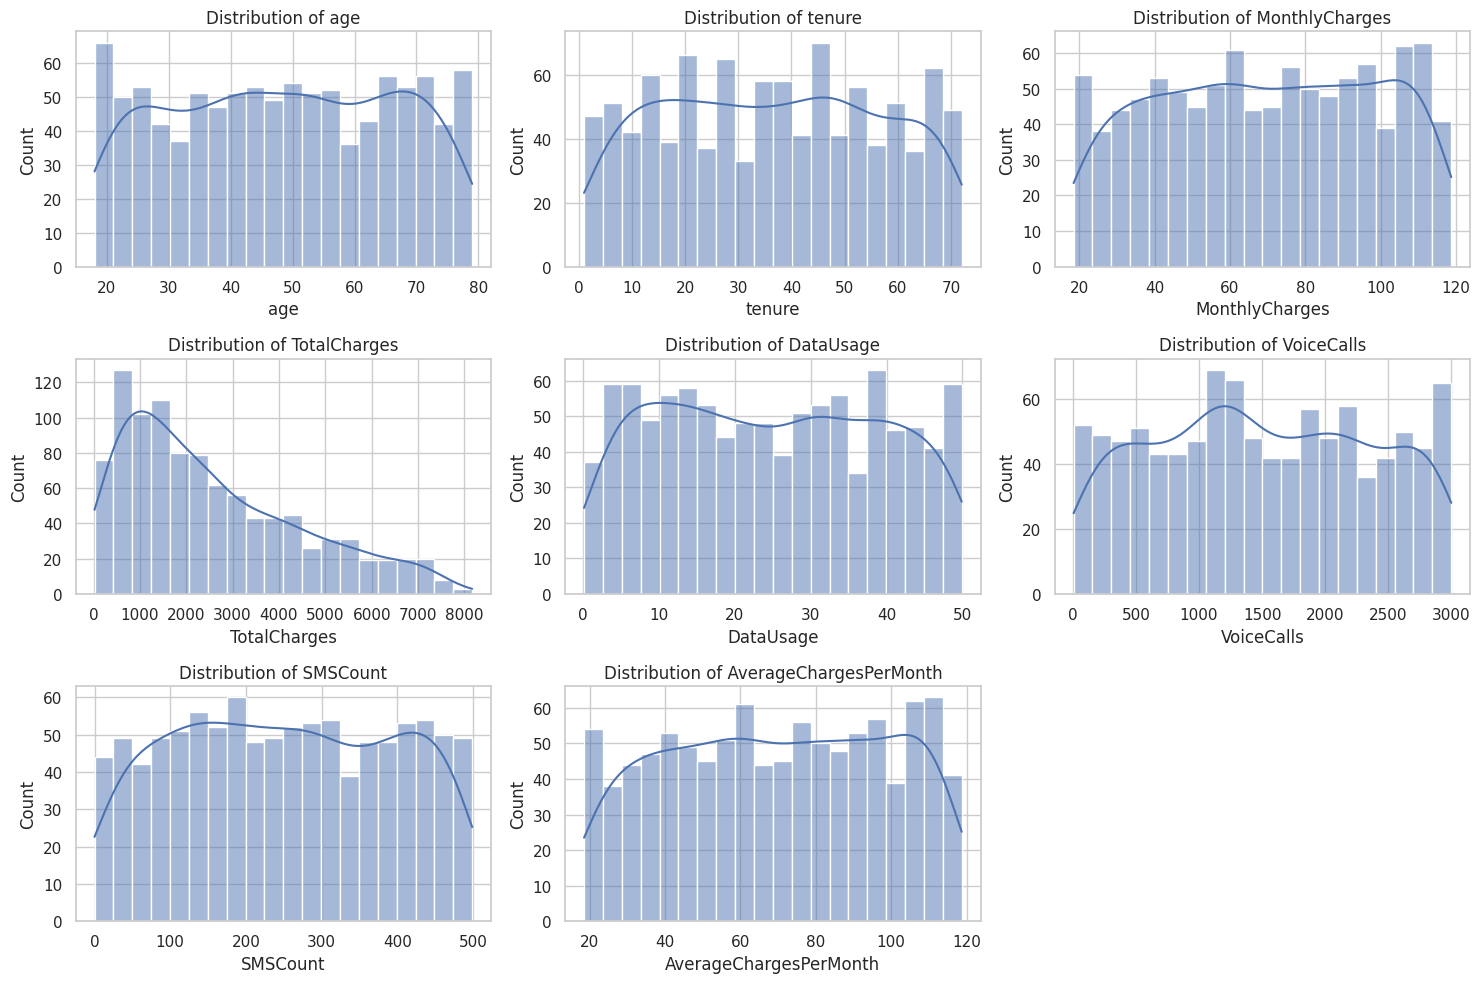

<ipython-input-5-9c12a67d212b>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='Set2')
<ipython-input-5-9c12a67d212b>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='Set2')
<ipython-input-5-9c12a67d212b>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='Set2')
<ipython-input-5-9c12a67d212b>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for

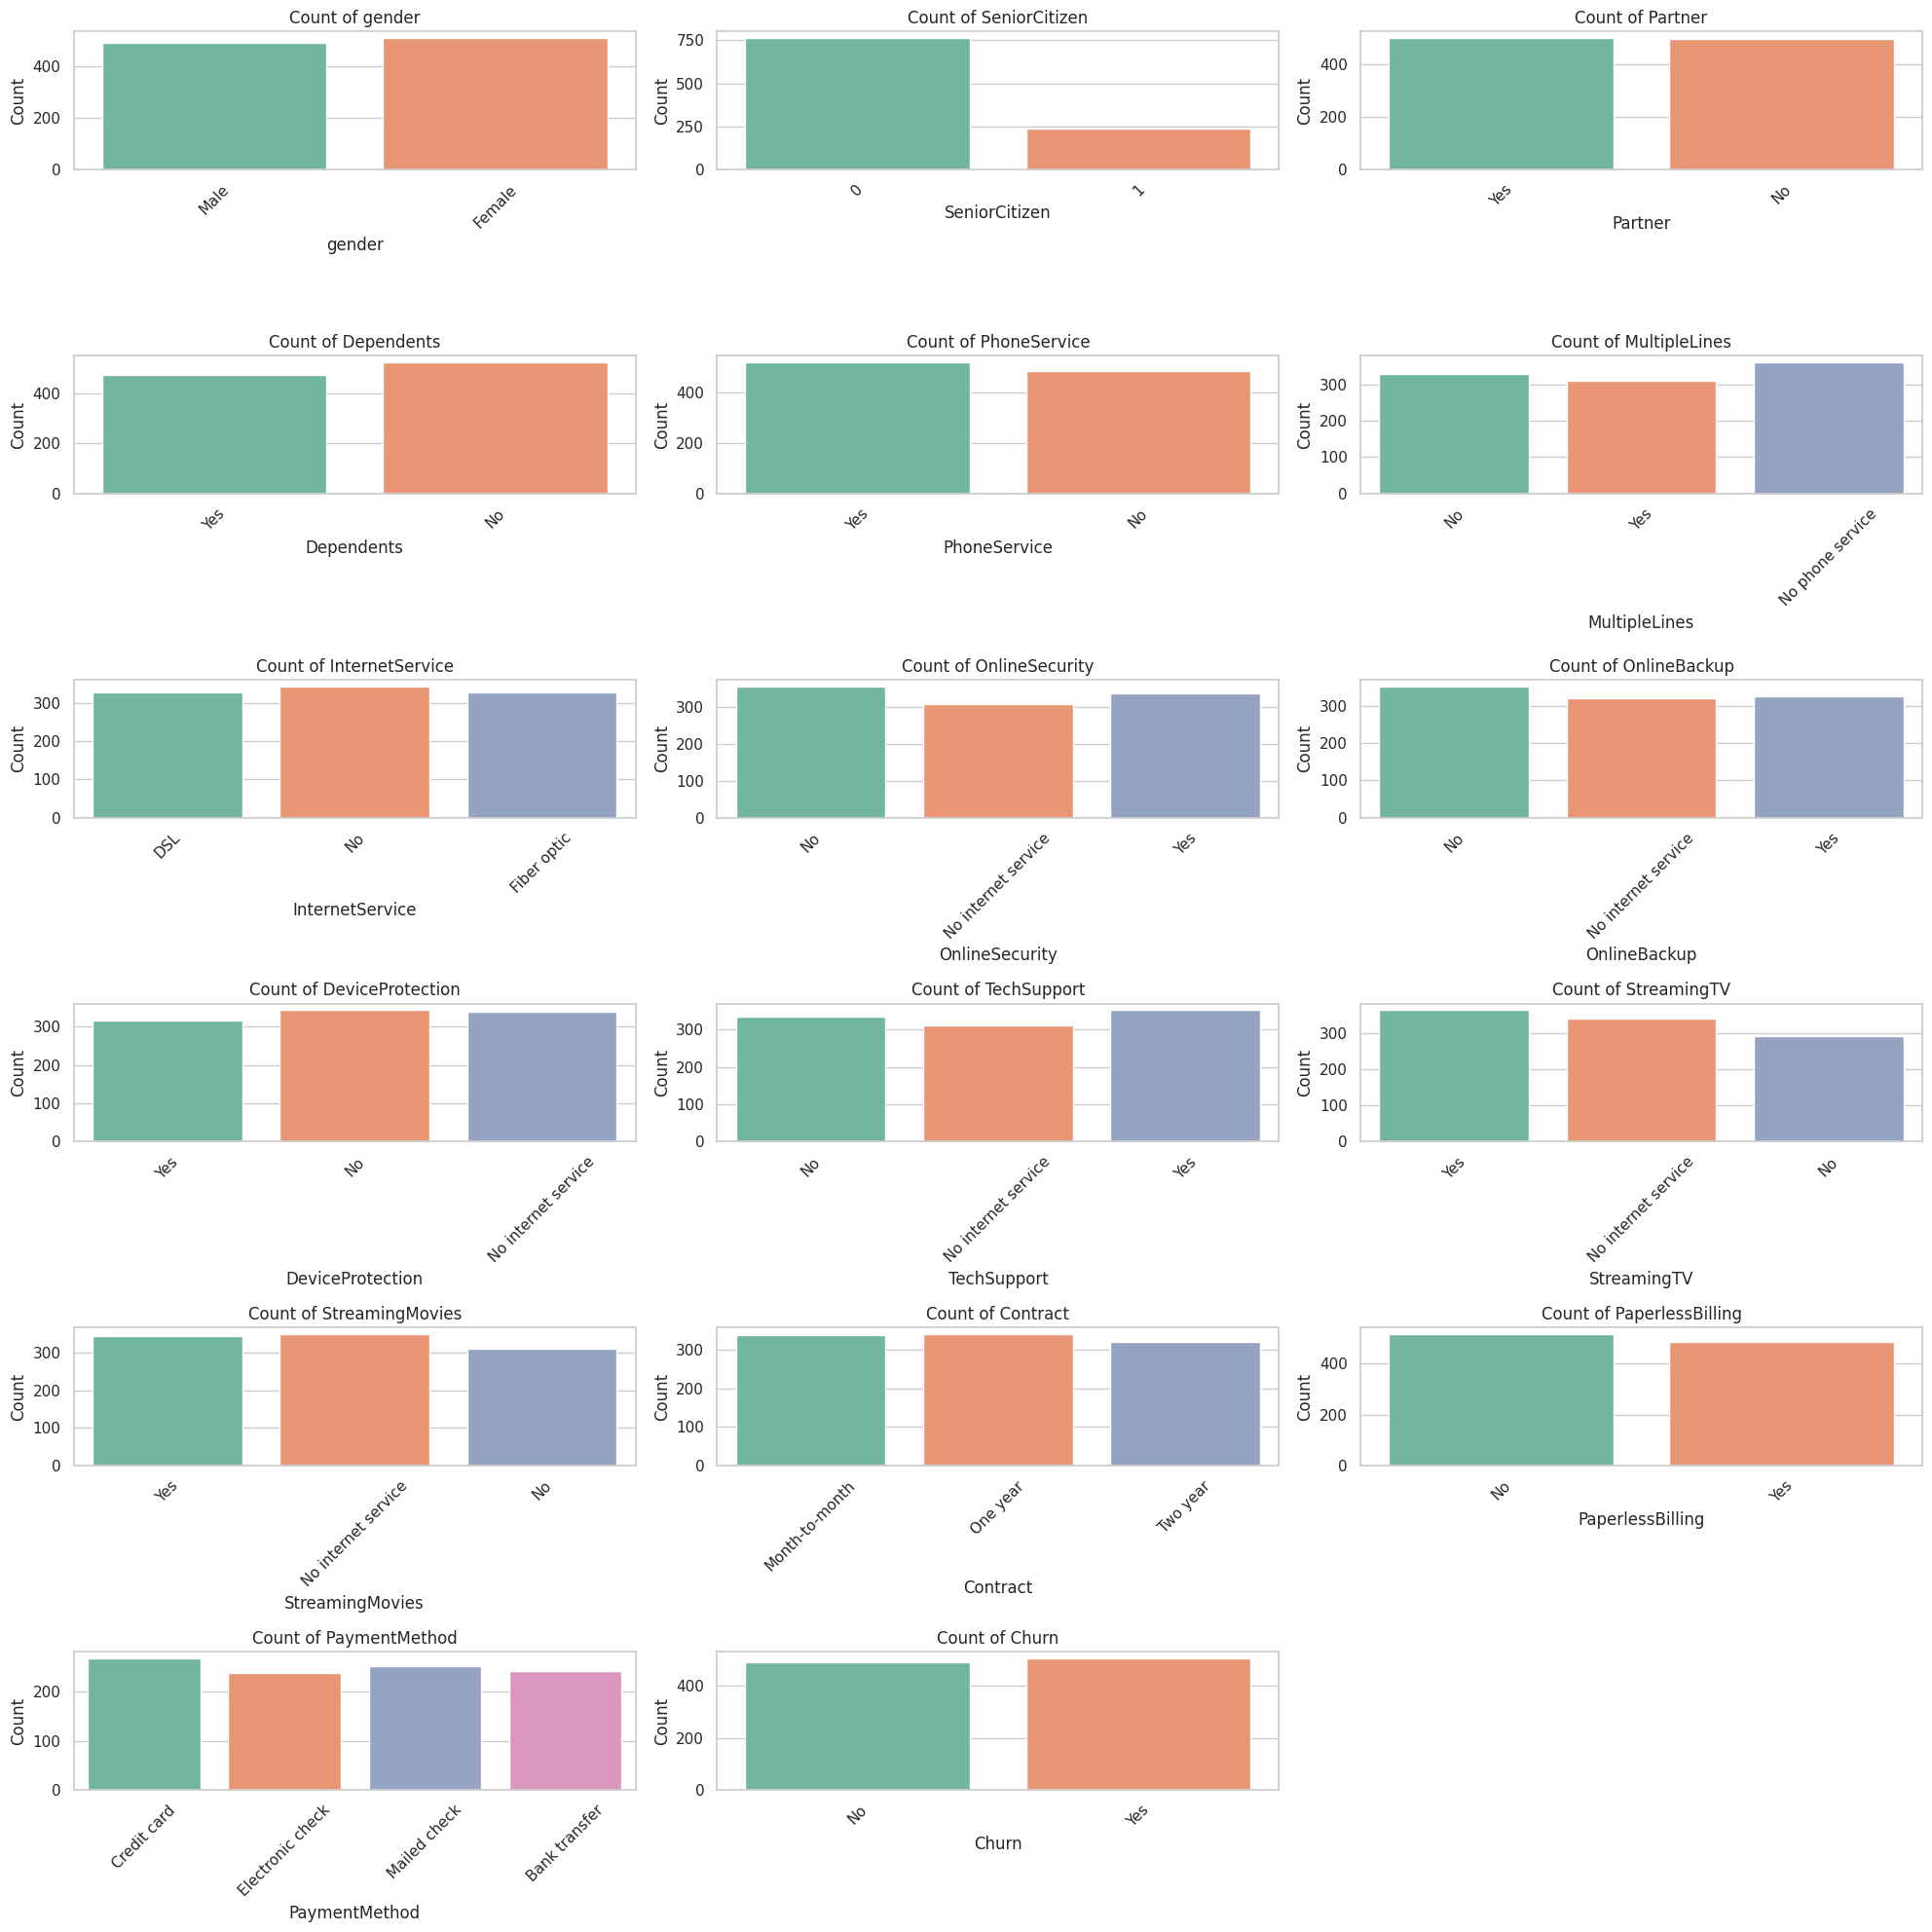

,customerID,gender,age,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DataUsage,VoiceCalls,SMSCount,AverageChargesPerMonth
count,1000.000000,1000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000,1000,...,1000,1000,1000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000
unique,NaN,2,NaN,NaN,2,2,NaN,2,3,3,...,3,2,4,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,Yes,No,NaN,Yes,No phone service,No,...,One year,No,Credit card,NaN,NaN,Yes,NaN,NaN,NaN,NaN
freq,NaN,510,NaN,NaN,501,526,NaN,518,361,344,...,340,514,268,NaN,NaN,507,NaN,NaN,NaN,NaN
mean,500.500000,NaN,48.394000,0.237000,NaN,NaN,36.500000,NaN,NaN,NaN,...,NaN,NaN,NaN,69.628320,2578.538780,NaN,24.759000,1508.065000,251.086000,69.628320
std,288.819436,NaN,17.818256,0.425455,NaN,NaN,20.329912,NaN,NaN,NaN,...,NaN,NaN,NaN,28.730009,1928.862064,NaN,14.461192,864.543198,142.532607,28.730009
min,1.000000,NaN,18.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,18.500000,21.030000,NaN,0.100000,6.000000,0.000000,18.500000
25%,250.750000,NaN,34.000000,0.000000,NaN,NaN,19.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,45.557500,1017.725000,NaN,12.075000,791.000000,130.500000,45.557500
50%,500.500000,NaN,49.000000,0.000000,NaN,NaN,37.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,69.785000,2125.310000,NaN,24.300000,1454.500000,249.500000,69.785000
75%,750.250000,NaN,64.000000,0.000000,NaN,NaN,53.250000,NaN,NaN,NaN,...,NaN,NaN,NaN,94.402500,3857.100000,NaN,37.700000,2225.250000,376.250000,94.402500


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for consistency
sns.set(style="whitegrid")

# Histogram for numerical features with explicit parameters
numerical_features = ['age', 'tenure', 'MonthlyCharges', 'TotalCharges', 'DataUsage', 'VoiceCalls', 'SMSCount', 'AverageChargesPerMonth']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Count plot for categorical features with explicit parameters
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

plt.figure(figsize=(20, 20))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(6, 3, i)
    sns.countplot(x=data[feature], palette='Set2')
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Summary statistics
summary_stats = data.describe(include='all')
summary_stats

## Data Preprocessing

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'Sample_Data.csv'
data = pd.read_csv(file_path)

# Replace 'No internet service' and 'No phone service' with 'No'
data.replace('No internet service', 'No', inplace=True)
data.replace('No phone service', 'No', inplace=True)

# Drop the CustomerID column
data = data.drop(columns=['customerID'])

# List of categorical features to encode
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Encode categorical features using LabelEncoder
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataframe to check the encoding
print(data.head())


   gender  age  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1   71              1        1           1       7             1   
1       0   34              0        0           1      70             1   
2       1   26              0        1           0      15             0   
3       1   50              0        0           1      32             0   
4       1   70              1        0           1      20             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                0               0             0   
1              1                2               0             0   
2              0                2               0             0   
3              0                1               1             0   
4              0                2               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 1            0            1                1  

## Visualizations for Relationship Analysis
1. Box Plots for Numerical Features

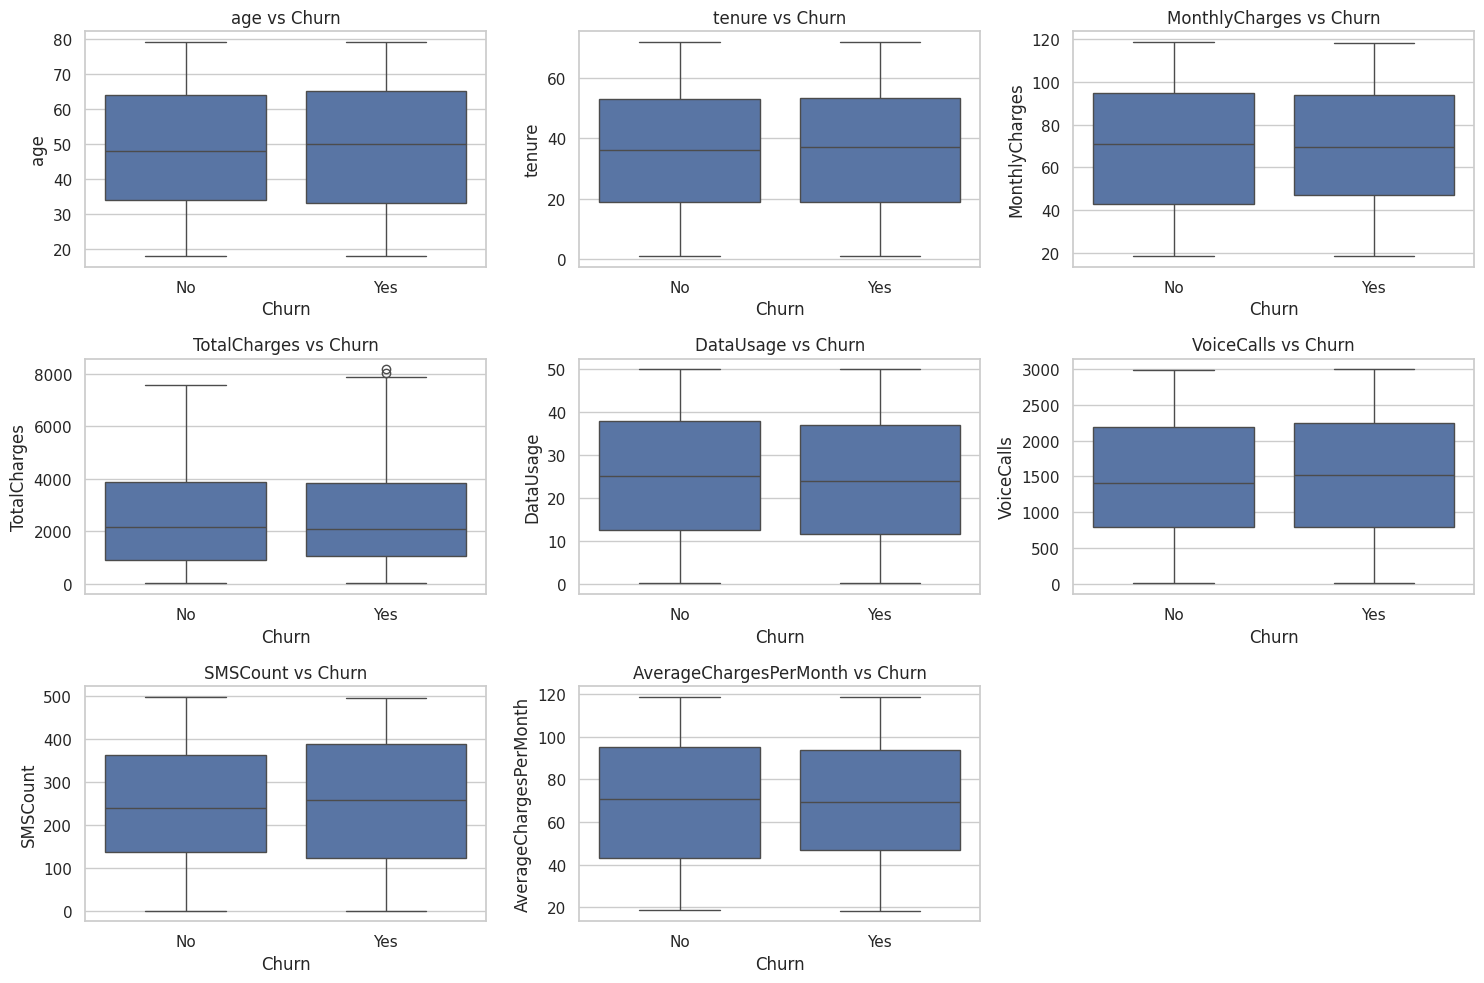

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Numerical features
numerical_features = ['age', 'tenure', 'MonthlyCharges', 'TotalCharges', 'DataUsage', 'VoiceCalls', 'SMSCount', 'AverageChargesPerMonth']

# Create box plots for numerical features
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Churn', y=feature, data=data)
    plt.title(f'{feature} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


2. Histograms for Numerical Features

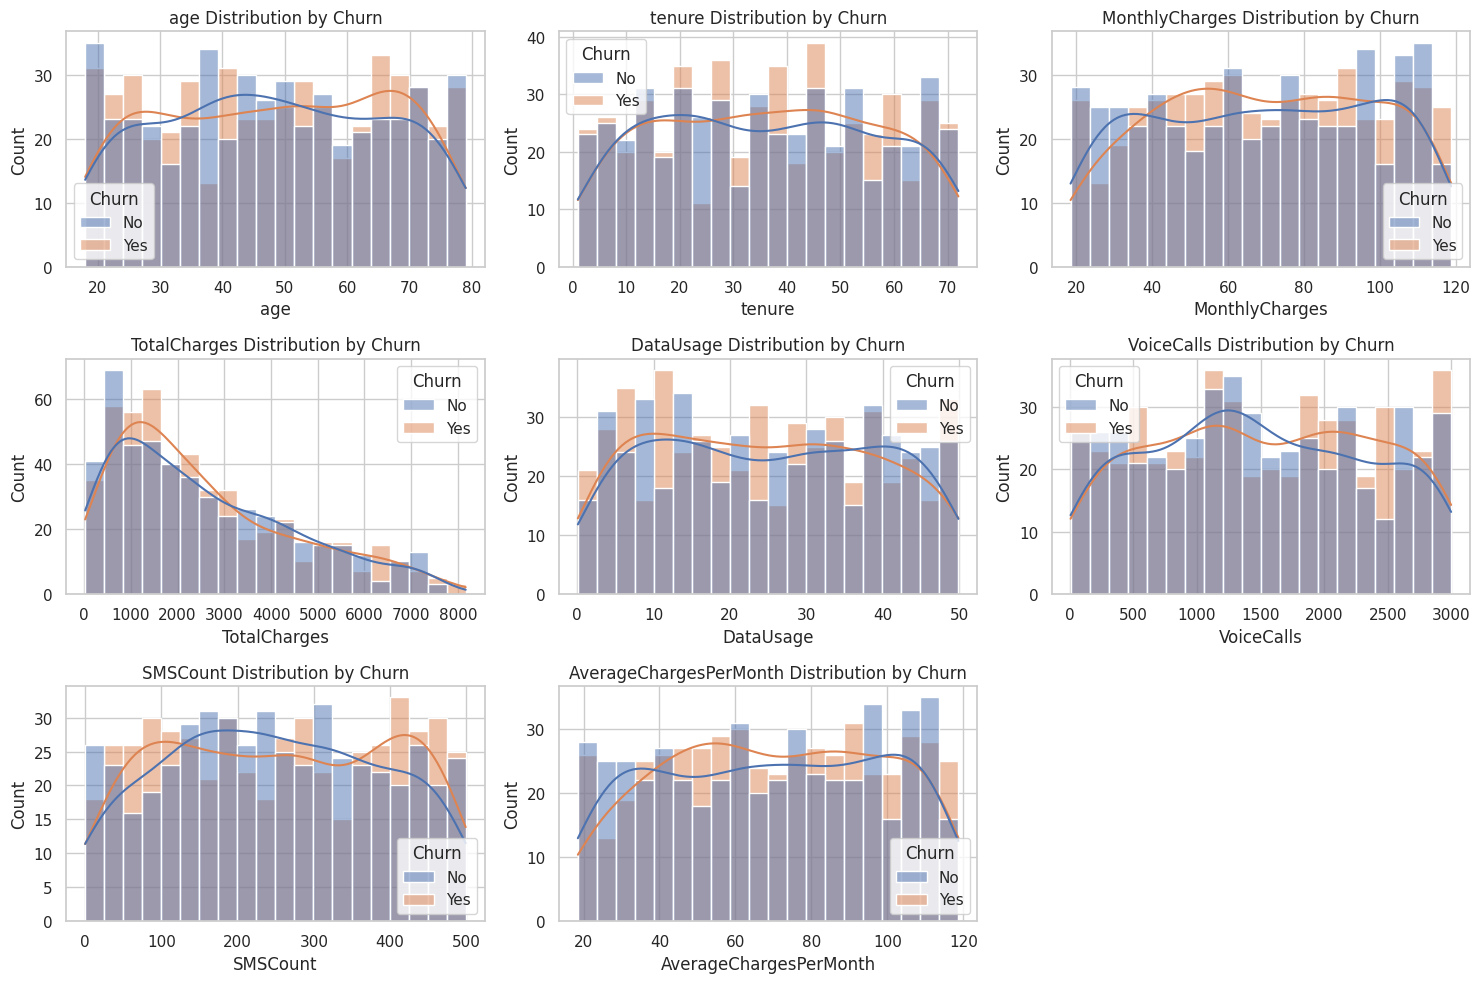

In [ ]:
# Create histograms for numerical features
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=data, x=feature, hue='Churn', kde=True, bins=20)
    plt.title(f'{feature} Distribution by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


3. Count Plots for Categorical Features


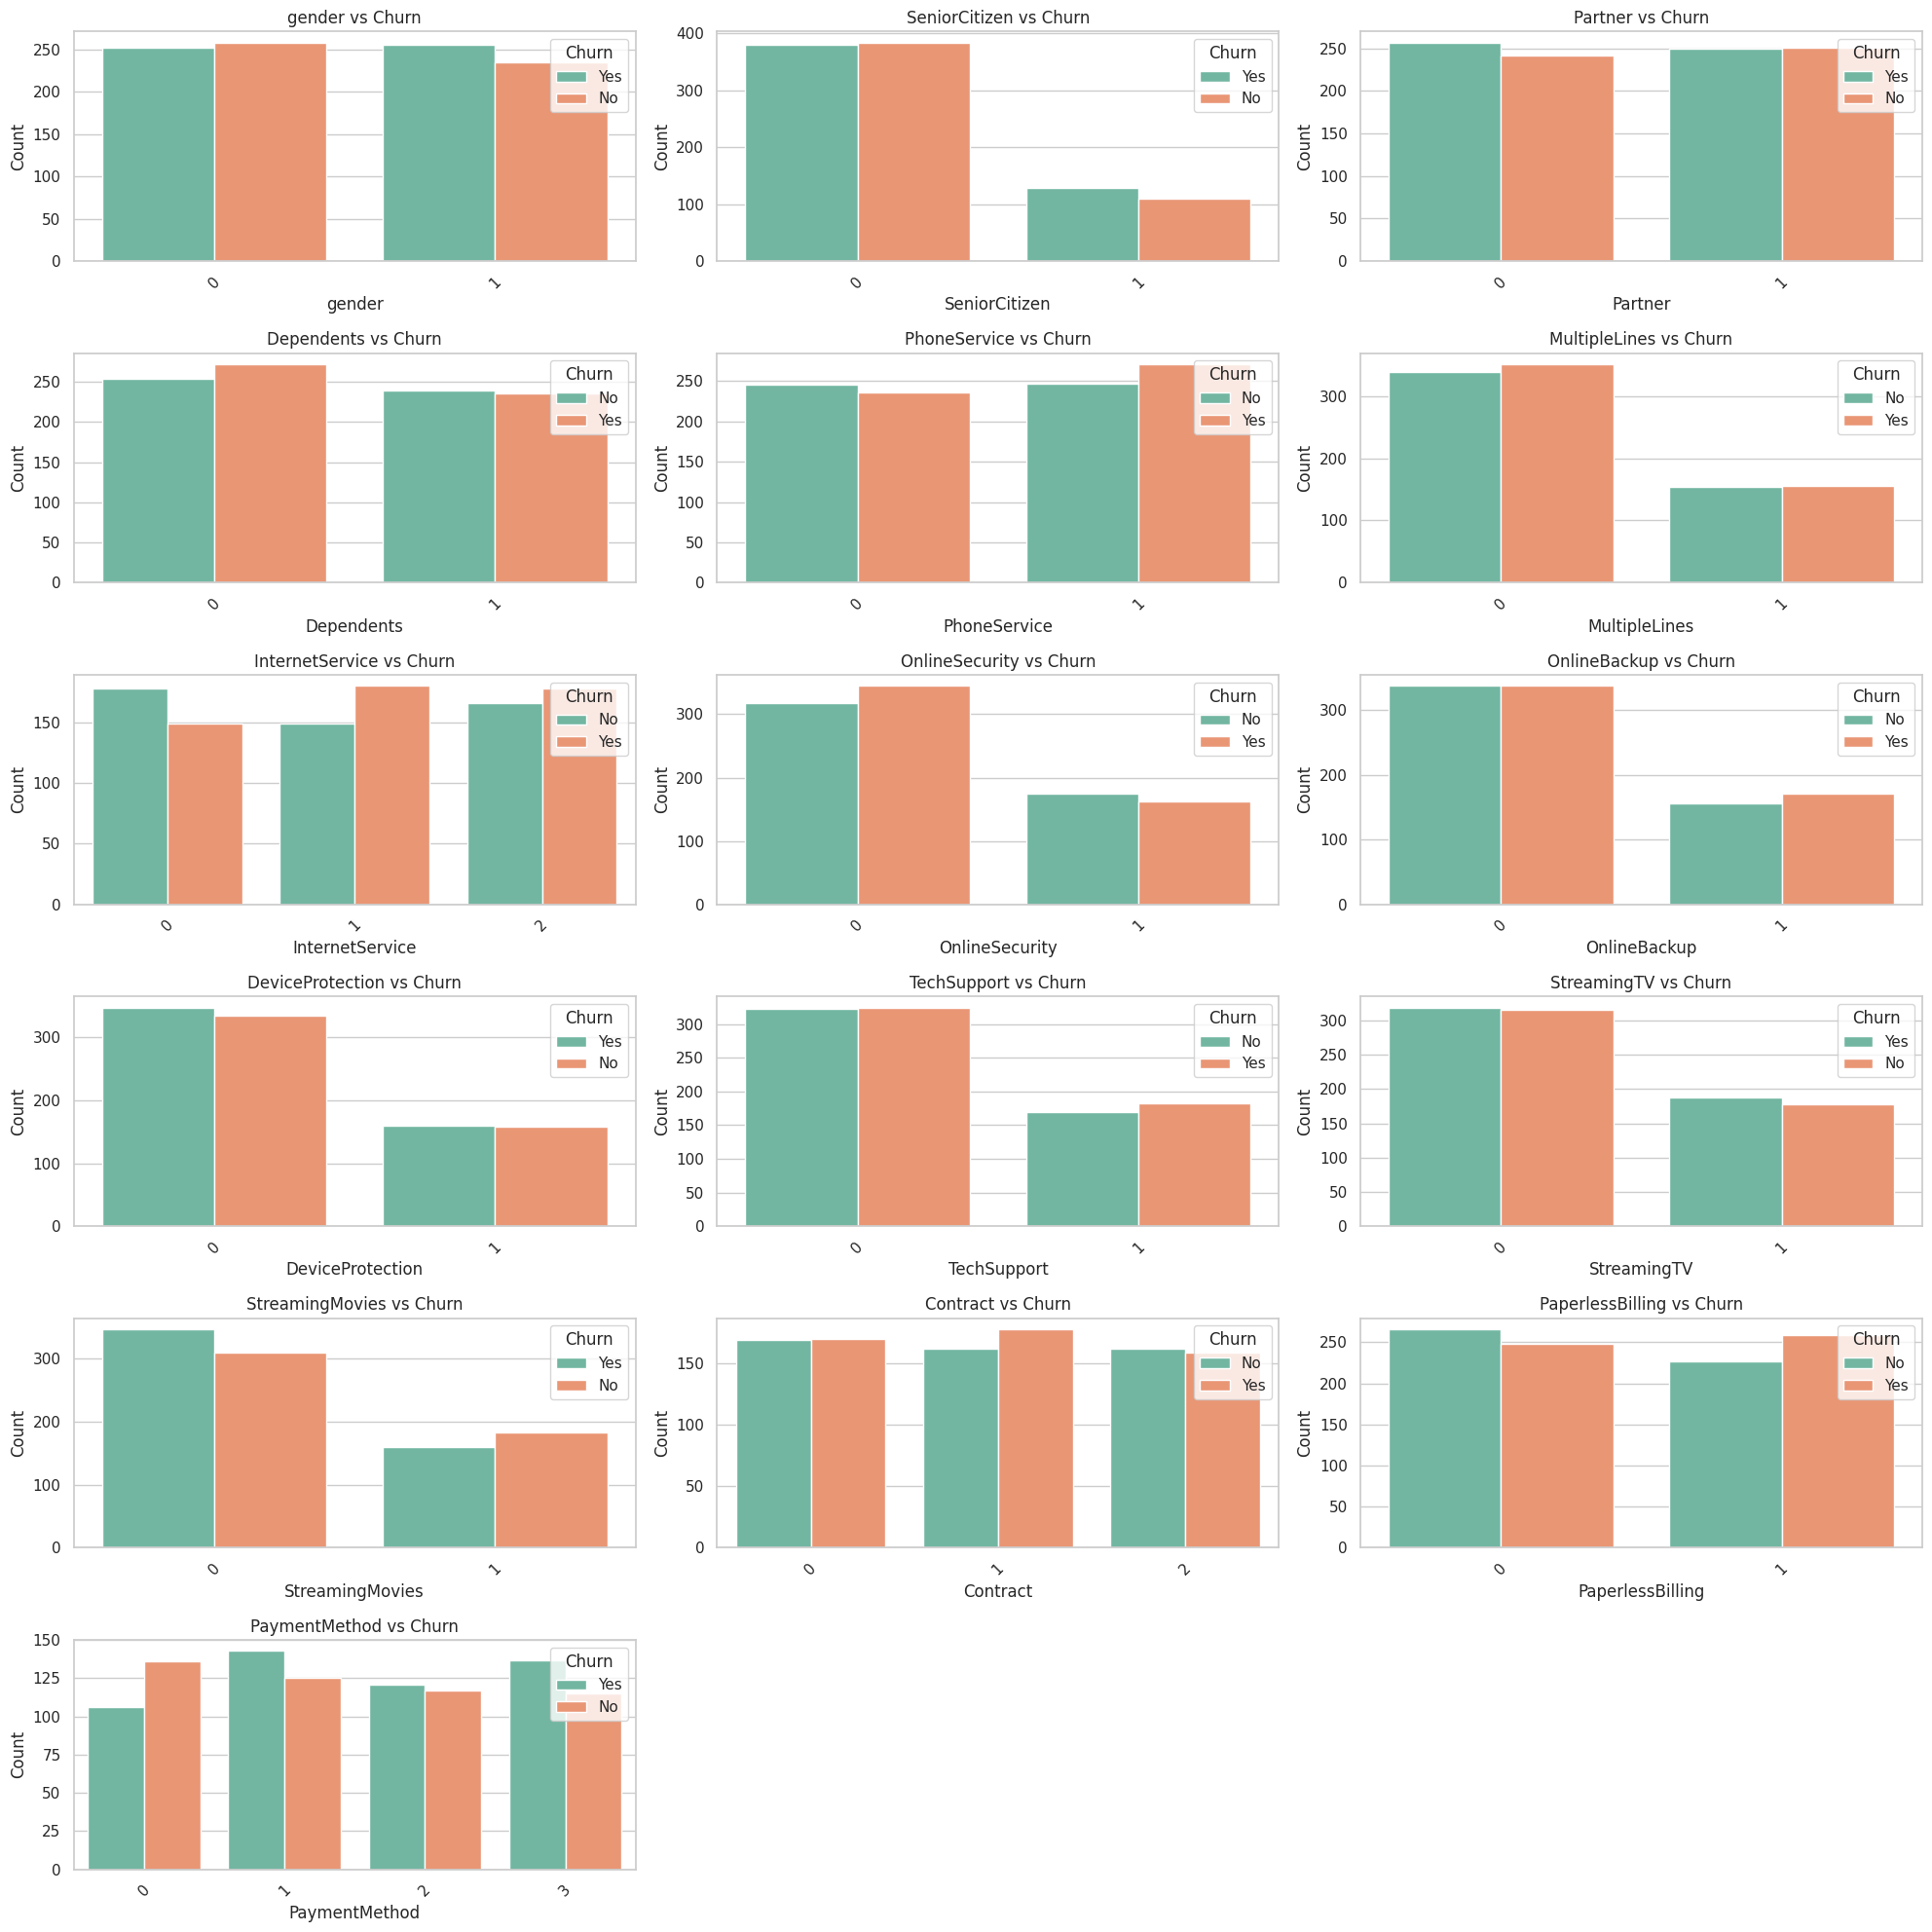

In [ ]:
# Categorical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Create count plots for categorical features
plt.figure(figsize=(20, 20))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(6, 3, i)
    sns.countplot(x=feature, hue='Churn', data=data, palette='Set2')
    plt.title(f'{feature} vs Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


4. Bar Plots for Proportion of Churn in Categorical Features


<ipython-input-12-4316e8acf470>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_proportion.index, y=churn_proportion.values, palette='Set2')
<ipython-input-12-4316e8acf470>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_proportion.index, y=churn_proportion.values, palette='Set2')
<ipython-input-12-4316e8acf470>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_proportion.index, y=churn_proportion.values, palette='Set2')
<ipython-input-12-4316e8acf470>:18: FutureWarning: 

Passing `palette` without assigning `hue`

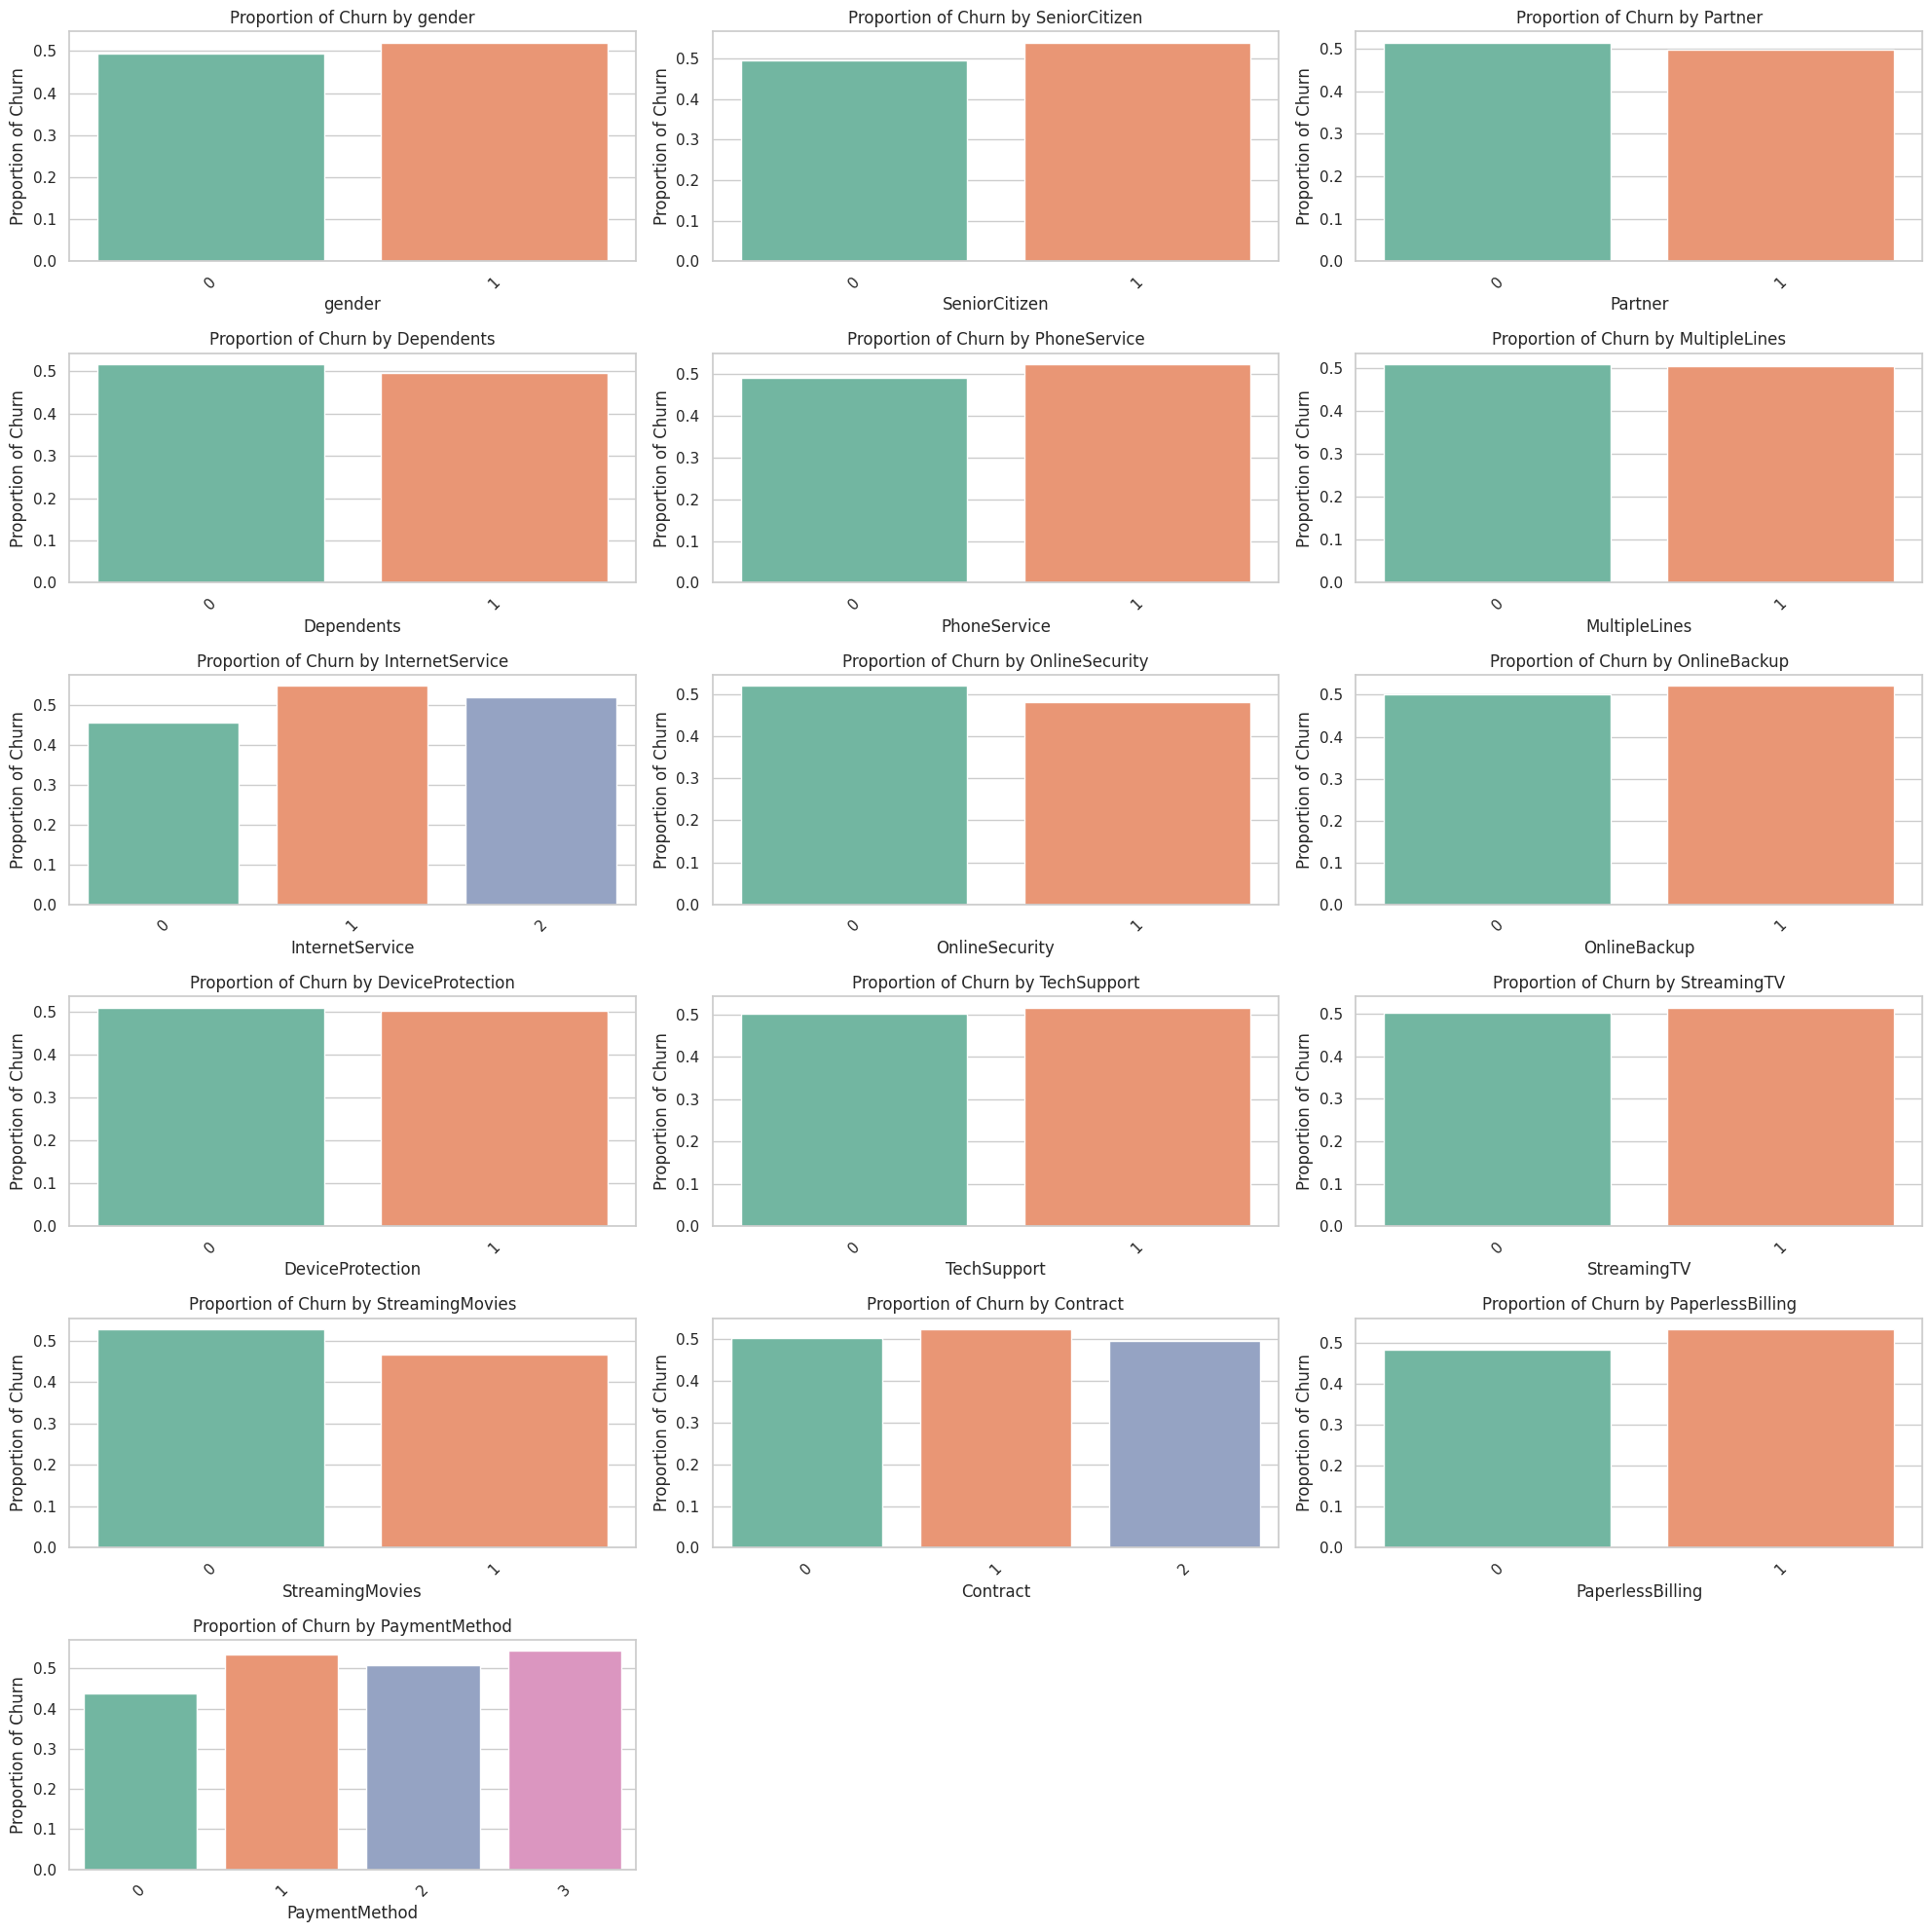

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Churn column to numeric
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Categorical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Create bar plots for proportion of churn in categorical features
plt.figure(figsize=(20, 20))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(6, 3, i)
    churn_proportion = data.groupby(feature)['Churn'].mean()
    sns.barplot(x=churn_proportion.index, y=churn_proportion.values, palette='Set2')
    plt.title(f'Proportion of Churn by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proportion of Churn')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Feature Engineering

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'Sample_Data.csv'
data = pd.read_csv(file_path)

# Replace 'No internet service' and 'No phone service' with 'No'
data.replace('No internet service', 'No', inplace=True)
data.replace('No phone service', 'No', inplace=True)

# Drop the CustomerID column
data = data.drop(columns=['customerID'])

# Encode Churn to numeric
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Create Tenure Group
data['TenureGroup'] = pd.cut(data['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '12-24', '24-36', '36-48', '48-60', '60-72'])

# Create Monthly Charges Bin
data['MonthlyChargesBin'] = pd.cut(data['MonthlyCharges'], bins=[0, 30, 60, 90, 120], labels=['0-30', '30-60', '60-90', '90-120'])

# Create Total Charges to Tenure Ratio
data['TotalChargesToTenure'] = data['TotalCharges'] / (data['tenure'] + 1e-5)  # Adding a small number to avoid division by zero

# Create Number of Services Subscribed
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
data['NumServicesSubscribed'] = data[services].apply(lambda x: x.eq('Yes').sum(), axis=1)

# Create Payment Method Type binary features
payment_methods = pd.get_dummies(data['PaymentMethod'], prefix='PaymentMethod')
data = pd.concat([data, payment_methods], axis=1)

# Drop the original PaymentMethod column
data = data.drop(columns=['PaymentMethod'])

# Display the first few rows of the dataframe to check the new features
print(data.head())

   gender  age  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    Male   71              1     Yes        Yes       7          Yes   
1  Female   34              0      No        Yes      70          Yes   
2    Male   26              0     Yes         No      15           No   
3    Male   50              0      No        Yes      32           No   
4    Male   70              1      No        Yes      20          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL             No           No              Yes   
1           Yes              No             No           No               No   
2            No              No             No           No               No   
3            No     Fiber optic            Yes           No              Yes   
4            No              No             No           No              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0 

## Data Normalization

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the dataset
file_path = 'Sample_Data.csv'
data = pd.read_csv(file_path)

# Replace 'No internet service' and 'No phone service' with 'No'
data.replace('No internet service', 'No', inplace=True)
data.replace('No phone service', 'No', inplace=True)

# Drop the CustomerID column
data = data.drop(columns=['customerID'])

# Encode Churn to numeric
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Create new features
data['TenureGroup'] = pd.cut(data['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '12-24', '24-36', '36-48', '48-60', '60-72'])
data['MonthlyChargesBin'] = pd.cut(data['MonthlyCharges'], bins=[0, 30, 60, 90, 120], labels=['0-30', '30-60', '60-90', '90-120'])
data['TotalChargesToTenure'] = data['TotalCharges'] / (data['tenure'] + 1e-5)
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
data['NumServicesSubscribed'] = data[services].apply(lambda x: x.eq('Yes').sum(), axis=1)
payment_methods = pd.get_dummies(data['PaymentMethod'], prefix='PaymentMethod')
data = pd.concat([data, payment_methods], axis=1)
data = data.drop(columns=['PaymentMethod'])

# Select numerical features for normalization
numerical_features = ['age', 'tenure', 'MonthlyCharges', 'TotalCharges', 'DataUsage', 'VoiceCalls', 'SMSCount', 'AverageChargesPerMonth', 'TotalChargesToTenure']

# Normalize numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the first few rows of the dataframe to check the normalization
print(data.head())


   gender       age  SeniorCitizen Partner Dependents    tenure PhoneService  \
0    Male  0.868852              1     Yes        Yes  0.084507          Yes   
1  Female  0.262295              0      No        Yes  0.971831          Yes   
2    Male  0.131148              0     Yes         No  0.197183           No   
3    Male  0.524590              0      No        Yes  0.436620           No   
4    Male  0.852459              1      No        Yes  0.267606          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL             No           No              Yes   
1           Yes              No             No           No               No   
2            No              No             No           No               No   
3            No     Fiber optic            Yes           No              Yes   
4            No              No             No           No              Yes   

  TechSupport StreamingTV StreamingMov

##Train-Test Split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = 'Sample_Data.csv'
data = pd.read_csv(file_path)

# Replace 'No internet service' and 'No phone service' with 'No'
data.replace('No internet service', 'No', inplace=True)
data.replace('No phone service', 'No', inplace=True)

# Drop the CustomerID column
data = data.drop(columns=['customerID'])

# Encode Churn to numeric
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Create new features
data['TenureGroup'] = pd.cut(data['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '12-24', '24-36', '36-48', '48-60', '60-72'])
data['MonthlyChargesBin'] = pd.cut(data['MonthlyCharges'], bins=[0, 30, 60, 90, 120], labels=['0-30', '30-60', '60-90', '90-120'])
data['TotalChargesToTenure'] = data['TotalCharges'] / (data['tenure'] + 1e-5)
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
data['NumServicesSubscribed'] = data[services].apply(lambda x: x.eq('Yes').sum(), axis=1)
payment_methods = pd.get_dummies(data['PaymentMethod'], prefix='PaymentMethod')
data = pd.concat([data, payment_methods], axis=1)
data = data.drop(columns=['PaymentMethod'])

# Select numerical features for normalization
numerical_features = ['age', 'tenure', 'MonthlyCharges', 'TotalCharges', 'DataUsage', 'VoiceCalls', 'SMSCount', 'AverageChargesPerMonth', 'TotalChargesToTenure']

# Normalize numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Define features (X) and target (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display the shapes of the training and testing sets
print(f'Training set shape: {X_train.shape}')
print(f'Testing set shape: {X_test.shape}')
print(f'Training set target distribution:\n{y_train.value_counts(normalize=True)}')
print(f'Testing set target distribution:\n{y_test.value_counts(normalize=True)}')


Training set shape: (700, 31)
Testing set shape: (300, 31)
Training set target distribution:
Churn
1    0.507143
0    0.492857
Name: proportion, dtype: float64
Testing set target distribution:
Churn
1    0.506667
0    0.493333
Name: proportion, dtype: float64


## Model Training
1. K- Nearest Neighbour
2. Linear Discriminant Analisys
3. Support Vector Machine
4. XGBoost

##Model Selection

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
file_path = 'Sample_Data.csv'
data = pd.read_csv(file_path)

# Replace 'No internet service' and 'No phone service' with 'No'
data.replace('No internet service', 'No', inplace=True)
data.replace('No phone service', 'No', inplace=True)

# Drop the CustomerID column
data = data.drop(columns=['customerID'])

# Encode Churn to numeric
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Ensure 'TotalCharges' is numeric, handling possible conversion issues
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Define features (X) and target (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# List of categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipelines for both numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define models
models = {
    "Support Vector Machine (Linear)": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC(kernel='linear', random_state=42))]),
    "K-Nearest Neighbors": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())]),
    "Linear Discriminant Analysis": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LinearDiscriminantAnalysis())]),
    "XGBoost": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(random_state=42))])
}

# Train models and evaluate on the training set
train_results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Train set evaluation
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_results[model_name] = {
        "Accuracy": train_accuracy,
        "Precision": train_precision,
        "Recall": train_recall,
        "F1 Score": train_f1
    }

# Display results
train_results_df = pd.DataFrame(train_results).T

print("Training Set Results:")
print(train_results_df)


Training Set Results:
                                 Accuracy  Precision    Recall  F1 Score
Support Vector Machine (Linear)  0.575714   0.582386  0.577465  0.579915
K-Nearest Neighbors              0.650000   0.652778  0.661972  0.657343
Linear Discriminant Analysis     0.570000   0.572581  0.600000  0.585970
XGBoost                          1.000000   1.000000  1.000000  1.000000


##XGBoost Full Hyper-parameters Tunning and Test Set Evaluation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Load the dataset
file_path = 'Sample_Data.csv'
data = pd.read_csv(file_path)

# Replace 'No internet service' and 'No phone service' with 'No'
data.replace('No internet service', 'No', inplace=True)
data.replace('No phone service', 'No', inplace=True)

# Drop the CustomerID column
data = data.drop(columns=['customerID'])

# Encode Churn to numeric
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Ensure 'TotalCharges' is numeric, handling possible conversion issues
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Create new features
data['TenureGroup'] = pd.cut(data['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '12-24', '24-36', '36-48', '48-60', '60-72'])
data['MonthlyChargesBin'] = pd.cut(data['MonthlyCharges'], bins=[0, 30, 60, 90, 120], labels=['0-30', '30-60', '60-90', '90-120'])
data['TotalChargesToTenure'] = data['TotalCharges'] / (data['tenure'] + 1e-5)  # Adding a small number to avoid division by zero
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
data['NumServicesSubscribed'] = data[services].apply(lambda x: x.eq('Yes').sum(), axis=1)
payment_methods = pd.get_dummies(data['PaymentMethod'], prefix='PaymentMethod')
data = pd.concat([data, payment_methods], axis=1)
data = data.drop(columns=['PaymentMethod'])

# Define features (X) and target (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# List of categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipelines for both numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the XGBoost model pipeline with regularization
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'classifier__n_estimators': sp_randint(50, 500),
    'classifier__learning_rate': sp_uniform(0.01, 0.3),
    'classifier__max_depth': sp_randint(3, 10),
    'classifier__min_child_weight': sp_randint(1, 10),
    'classifier__subsample': sp_uniform(0.5, 0.5),
    'classifier__colsample_bytree': sp_uniform(0.5, 0.5),
    'classifier__colsample_bylevel': sp_uniform(0.5, 0.5),
    'classifier__colsample_bynode': sp_uniform(0.5, 0.5),
    'classifier__gamma': sp_uniform(0, 5),
    'classifier__scale_pos_weight': sp_uniform(0.1, 10),
    'classifier__alpha': sp_uniform(0, 1),  # L1 regularization term
    'classifier__lambda': sp_uniform(1, 2)  # L2 regularization term
}

# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=200, cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

# Train the model with the best parameters on the entire training set
best_xgb_model = random_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_test_pred = best_xgb_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters found:  {'classifier__alpha': 0.5265784666592938, 'classifier__colsample_bylevel': 0.9003748857430605, 'classifier__colsample_bynode': 0.9894657178079806, 'classifier__colsample_bytree': 0.9198944297282853, 'classifier__gamma': 4.334968800057617, 'classifier__lambda': 1.8159689907296894, 'classifier__learning_rate': 0.17551677857780193, 'classifier__max_depth': 5, 'classifier__min_child_weight': 8, 'classifier__n_estimators': 492, 'classifier__scale_pos_weight': 5.155078791060338, 'classifier__subsample': 0.7975244898502103}
Best cross-validation score: 0.53
Accuracy: 0.5200
Precision: 0.5140
Recall: 0.9671
F1 Score: 0.6712


##Feature Importance

Accuracy: 0.5200
Precision: 0.5140
Recall: 0.9671
F1 Score: 0.6712


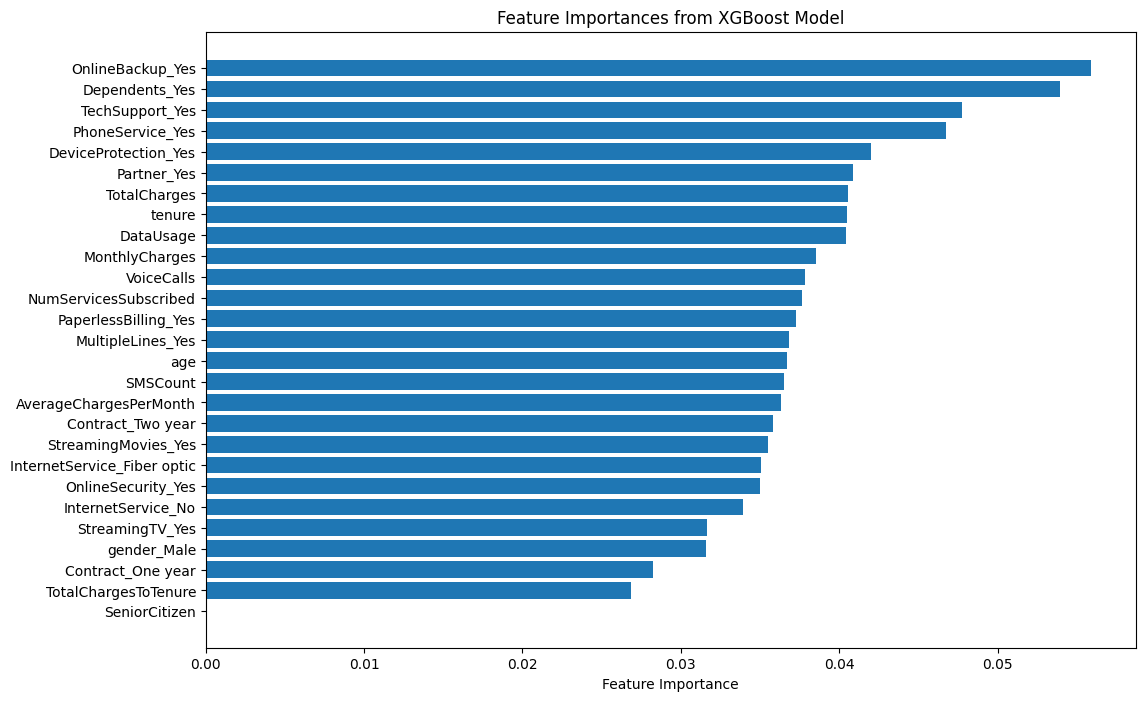

,Feature,Importance
19,OnlineBackup_Yes,0.055930
13,Dependents_Yes,0.053948
21,TechSupport_Yes,0.047727
14,PhoneService_Yes,0.046743
20,DeviceProtection_Yes,0.042020
12,Partner_Yes,0.040892
4,TotalCharges,0.040565
2,tenure,0.040489
5,DataUsage,0.040412
3,MonthlyCharges,0.038531


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
file_path = 'Sample_Data.csv'
data = pd.read_csv(file_path)

# Replace 'No internet service' and 'No phone service' with 'No'
data.replace('No internet service', 'No', inplace=True)
data.replace('No phone service', 'No', inplace=True)

# Drop the CustomerID column
data = data.drop(columns=['customerID'])

# Encode Churn to numeric
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Ensure 'TotalCharges' is numeric, handling possible conversion issues
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Create new features
data['TenureGroup'] = pd.cut(data['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '12-24', '24-36', '36-48', '48-60', '60-72'])
data['MonthlyChargesBin'] = pd.cut(data['MonthlyCharges'], bins=[0, 30, 60, 90, 120], labels=['0-30', '30-60', '60-90', '90-120'])
data['TotalChargesToTenure'] = data['TotalCharges'] / (data['tenure'] + 1e-5)  # Adding a small number to avoid division by zero
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
data['NumServicesSubscribed'] = data[services].apply(lambda x: x.eq('Yes').sum(), axis=1)
payment_methods = pd.get_dummies(data['PaymentMethod'], prefix='PaymentMethod')
data = pd.concat([data, payment_methods], axis=1)
data = data.drop(columns=['PaymentMethod'])

# Define features (X) and target (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# List of categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipelines for both numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the XGBoost model pipeline with the best hyperparameters
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        random_state=42,
        alpha=0.5265784666592938,
        colsample_bylevel=0.9003748857430605,
        colsample_bynode=0.9894657178079806,
        colsample_bytree=0.9198944297282853,
        gamma=4.334968800057617,
        reg_lambda=1.8159689907296894,
        learning_rate=0.17551677857780193,
        max_depth=5,
        min_child_weight=8,
        n_estimators=492,
        scale_pos_weight=5.155078791060338,
        subsample=0.7975244898502103
    ))
])

# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the model with the best parameters on the entire training set
xgb_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_test_pred = xgb_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Extract feature importances from the XGBoost model
xgb_classifier = xgb_model.named_steps['classifier']
feature_importances = xgb_classifier.feature_importances_

# Get the final feature names after preprocessing
preprocessed_feature_names = list(preprocessor.transformers_[0][2]) + list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_features))

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({
    'Feature': preprocessed_feature_names,
    'Importance': feature_importances
})

# Sort by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances from XGBoost Model')
plt.gca().invert_yaxis()
plt.show()

# Display feature importances
feature_importances_df


#SHAP

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.8 MB/s eta 0:00:00


Accuracy: 0.5200
Precision: 0.5140
Recall: 0.9671
F1 Score: 0.6712


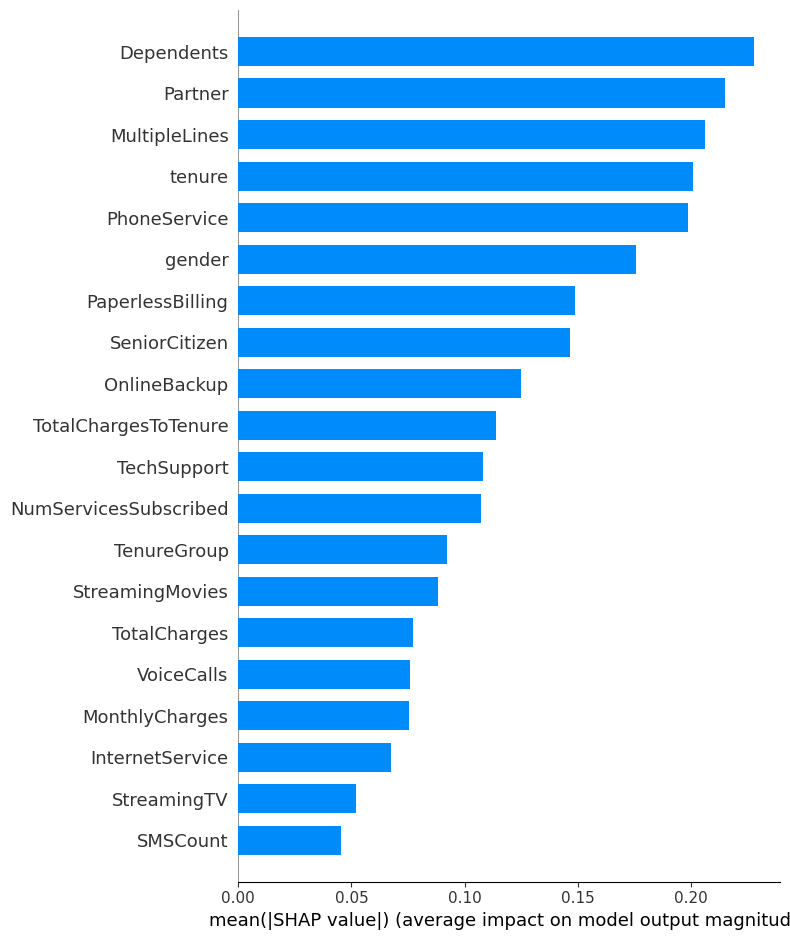

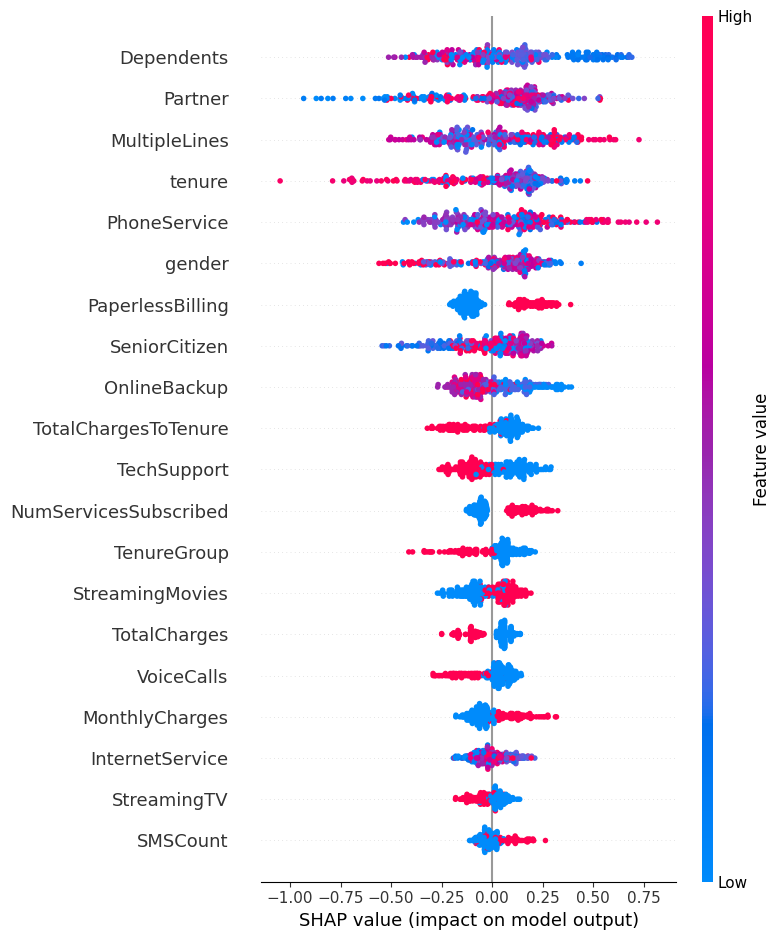

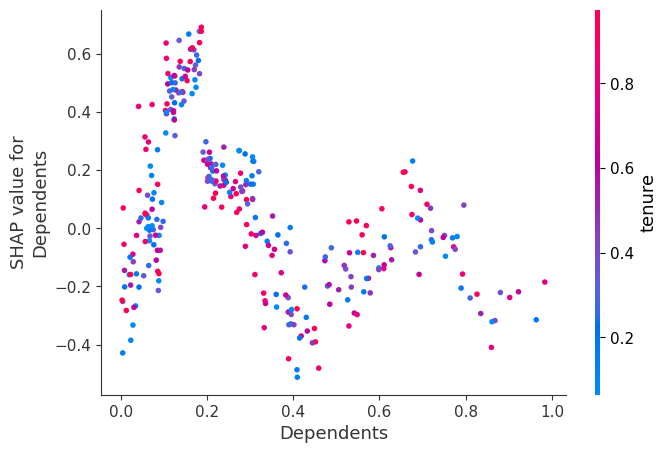

In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
file_path = 'Sample_Data.csv'
data = pd.read_csv(file_path)

# Replace 'No internet service' and 'No phone service' with 'No'
data.replace('No internet service', 'No', inplace=True)
data.replace('No phone service', 'No', inplace=True)

# Drop the CustomerID column
data = data.drop(columns=['customerID'])

# Encode Churn to numeric
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Ensure 'TotalCharges' is numeric, handling possible conversion issues
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Create new features
data['TenureGroup'] = pd.cut(data['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '12-24', '24-36', '36-48', '48-60', '60-72'])
data['MonthlyChargesBin'] = pd.cut(data['MonthlyCharges'], bins=[0, 30, 60, 90, 120], labels=['0-30', '30-60', '60-90', '90-120'])
data['TotalChargesToTenure'] = data['TotalCharges'] / (data['tenure'] + 1e-5)  # Adding a small number to avoid division by zero
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
data['NumServicesSubscribed'] = data[services].apply(lambda x: x.eq('Yes').sum(), axis=1)
payment_methods = pd.get_dummies(data['PaymentMethod'], prefix='PaymentMethod')
data = pd.concat([data, payment_methods], axis=1)
data = data.drop(columns=['PaymentMethod'])

# Define features (X) and target (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# List of categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipelines for both numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the XGBoost model pipeline with the best hyperparameters
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        random_state=42,
        alpha=0.5265784666592938,
        colsample_bylevel=0.9003748857430605,
        colsample_bynode=0.9894657178079806,
        colsample_bytree=0.9198944297282853,
        gamma=4.334968800057617,
        reg_lambda=1.8159689907296894,
        learning_rate=0.17551677857780193,
        max_depth=5,
        min_child_weight=8,
        n_estimators=492,
        scale_pos_weight=5.155078791060338,
        subsample=0.7975244898502103
    ))
])

# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the model with the best parameters on the entire training set
xgb_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_test_pred = xgb_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Compute SHAP values
preprocessor = xgb_model.named_steps['preprocessor']
X_test_transformed = preprocessor.transform(X_test)

# Initialize SHAP explainer
explainer = shap.Explainer(xgb_model.named_steps['classifier'], X_test_transformed)

# Compute SHAP values
shap_values = explainer(X_test_transformed)

# Plot summary plot (bar)
shap.summary_plot(shap_values, X_test_transformed, plot_type='bar', feature_names=X_test.columns)

# Plot detailed summary plot
shap.summary_plot(shap_values, X_test_transformed, feature_names=X_test.columns)

# Plot dependence plot for the top feature
top_feature = X_test.columns[np.argmax(np.abs(shap_values.values).mean(0))]
shap.dependence_plot(top_feature, shap_values.values, X_test_transformed, feature_names=X_test.columns)
